# Cauchy Euler Equation
$$ x^2 y'' + 6xy' + 4y =0, y(1)=6, y(2)=\frac{5}{4}$$

Solution: $y=4x^{-4} + 2 x^{-1}$

## DeepMacroFin (MLP)

In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from deep_macrofin import PDEModel
from deep_macrofin import ActivationType, Comparator, Constraint, OptimizerType, System, plot_loss_df

ode = PDEModel("cauchy_euler", {"optimizer_type": OptimizerType.Adam})
ode.set_state(["x"], {"x": [1., 2.]})
ode.add_endog("y")
ode.add_endog_equation("x**2 * y_xx + 6*x*y_x + 4*y=0", label="base_ode")
ode.add_endog_condition("y", 
                              "y(SV)", {"SV": torch.ones((1, 1))},
                              Comparator.EQ,
                              "6", {},
                              label="ic1")
ode.add_endog_condition("y", 
                              "y(SV)", {"SV": 2 * torch.ones((1, 1))},
                              Comparator.EQ,
                              "5/4", {},
                              label="ic2")
print(ode)
if not os.path.exists("./models/cauchy_euler_mlp/cauchy_euler.pt"):
    ode.train_model("./models/cauchy_euler_mlp", "cauchy_euler.pt", True)
    ode.load_model("./models/cauchy_euler_mlp", "cauchy_euler_best.pt", True)
    ode.eval_model(True)
else:
    ode.load_model(torch.load("./models/cauchy_euler_mlp/cauchy_euler_best.pt"))
    ode.eval_model(True)

=========================Summary of Model cauchy_euler==========================
Config: {
 "batch_size": 100,
 "num_epochs": 1000,
 "lr": 0.001,
 "loss_log_interval": 100,
 "optimizer_type": "Adam"
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
x: [1.0, 2.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: y
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=30, bias=True)
    (activation_0): Tanh()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Tanh()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Tanh()
    (linear_3): Linear(in_features=30, out_features=30, bias

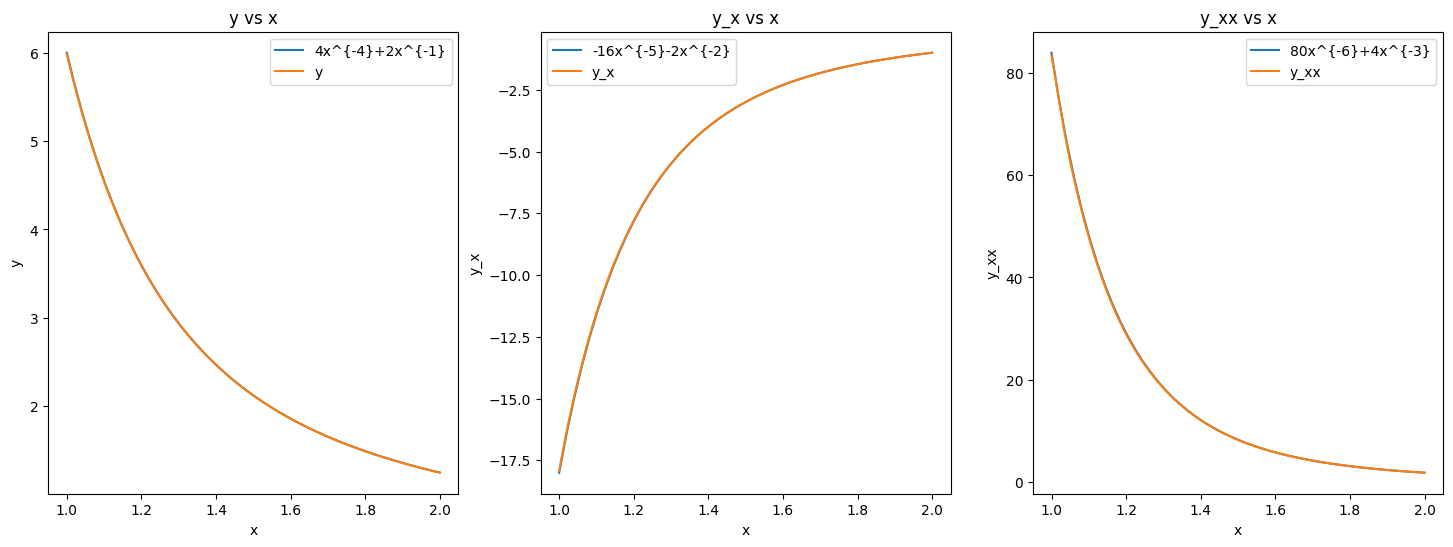

In [2]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
x = np.linspace(1, 2)
ax[0].plot(x, 4*x**(-4) + 2 * x**(-1), label="4x^{-4}+2x^{-1}")
ax[1].plot(x, -16*x**(-5)-2*x**(-2), label="-16x^{-5}-2x^{-2}")
ax[2].plot(x, 80*x**(-6) + 4*x**(-3), label="80x^{-6}+4x^{-3}")
ode.endog_vars["y"].plot("y", {"x": [1, 2]}, ax=ax[0])
ode.endog_vars["y"].plot("y_x", {"x": [1, 2]}, ax=ax[1])
ode.endog_vars["y"].plot("y_xx", {"x": [1, 2]}, ax=ax[2])
plt.subplots_adjust()
plt.show()

## DeepMacroFin (KAN)

In [3]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from deep_macrofin import PDEModel
from deep_macrofin import ActivationType, Comparator, Constraint, LayerType, OptimizerType, System, plot_loss_df

ode = PDEModel("cauchy_euler", config={"num_epochs": 100, "lr": 1, "loss_log_interval": 10})
ode.set_state(["x"], {"x": [1., 2.]})
ode.add_endog("y", config={
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "hidden_units": [1, 5, 5, 1],
    "layer_type": LayerType.KAN,
    "activation_type": ActivationType.SiLU,
    "positive": False,
    "derivative_order": 2,
})
ode.add_endog_equation("x**2 * y_xx + 6*x*y_x + 4*y=0", label="base_ode")
ode.add_endog_condition("y", 
                              "y(SV)", {"SV": torch.ones((1, 1))},
                              Comparator.EQ,
                              "6", {},
                              label="ic1")
ode.add_endog_condition("y", 
                              "y(SV)", {"SV": 2 * torch.ones((1, 1))},
                              Comparator.EQ,
                              "5/4", {},
                              label="ic2")
print(ode)
if not os.path.exists("./models/cauchy_euler_kan/cauchy_euler.pt"):
    ode.train_model("./models/cauchy_euler_kan", "cauchy_euler.pt", True)
    ode.load_model(torch.load("./models/cauchy_euler_kan/cauchy_euler_best.pt"))
    ode.eval_model(True)
else:
    ode.load_model(torch.load("./models/cauchy_euler_kan/cauchy_euler_best.pt"))
    ode.eval_model(True)

=========================Summary of Model cauchy_euler==========================
Config: {
 "batch_size": 100,
 "num_epochs": 100,
 "lr": 1,
 "loss_log_interval": 10,
 "optimizer_type": "AdamW"
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
x: [1.0, 2.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: y
EndogVar(
  (model): KAN(
    (biases): ModuleList(
      (0-1): 2 x Linear(in_features=5, out_features=1, bias=False)
      (2): Linear(in_features=1, out_features=1, bias=False)
    )
    (act_fun): ModuleList(
      (0-2): 3 x KANLayer(
        (base_fun): SiLU()
      )
    )
    (base_fun): SiLU()
    (symbolic_fun): ModuleList(
      (0-2): 3 x Symbolic_KANLayer()
    )


D:\UofT\Research\PDE-work\continuous-time-eco-models\deep_macrofin\models\kan\KAN.py:329: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1807.)
  self.acts_scale_std.append(torch.std(postacts, dim=0))


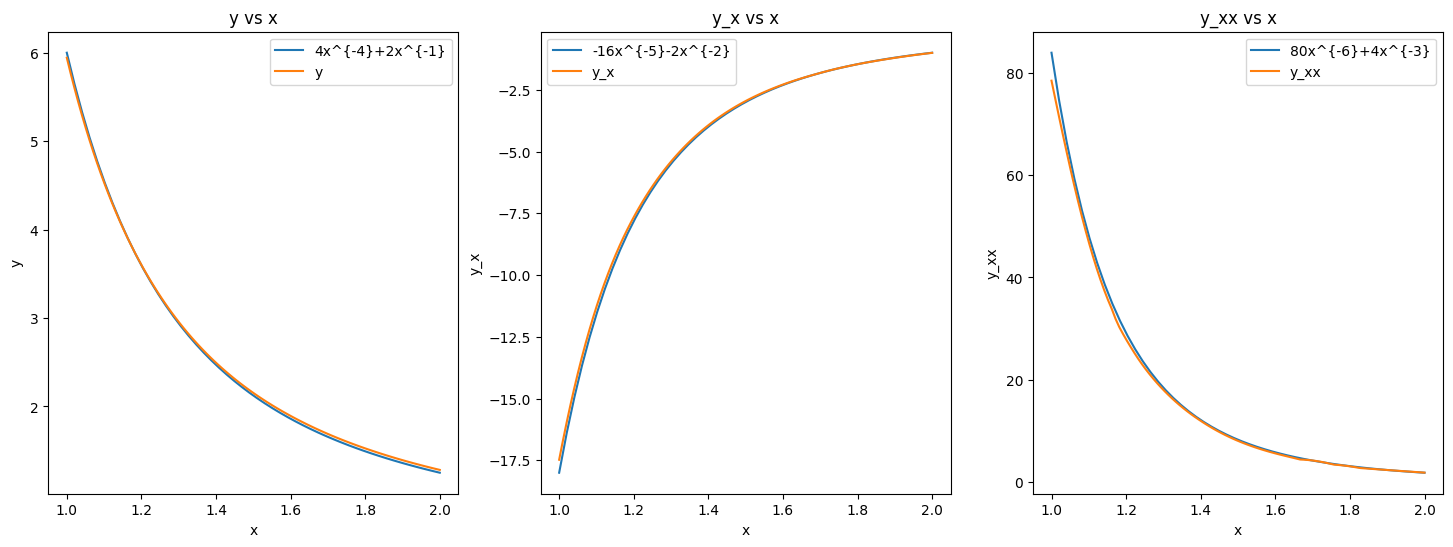

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
x = np.linspace(1, 2)
ax[0].plot(x, 4*x**(-4) + 2 * x**(-1), label="4x^{-4}+2x^{-1}")
ax[1].plot(x, -16*x**(-5)-2*x**(-2), label="-16x^{-5}-2x^{-2}")
ax[2].plot(x, 80*x**(-6) + 4*x**(-3), label="80x^{-6}+4x^{-3}")
ode.endog_vars["y"].plot("y", {"x": [1, 2]}, ax=ax[0])
ode.endog_vars["y"].plot("y_x", {"x": [1, 2]}, ax=ax[1])
ode.endog_vars["y"].plot("y_xx", {"x": [1, 2]}, ax=ax[2])
plt.subplots_adjust()
plt.show()

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Compiling model...
'compile' took 0.777137 s

Training model...

Step      Train loss                        Test loss                         Test metric   
0         [1.07e+01, 3.91e+01, 3.00e+00]    [1.08e+01, 3.91e+01, 3.00e+00]    [1.11e+00]    
1000      [4.74e-03, 7.51e-05, 8.11e-06]    [3.24e-03, 7.51e-05, 8.11e-06]    [1.14e-03]    

Best model at step 1000:
  train loss: 4.82e-03
  test loss: 3.32e-03
  test metric: [1.14e-03]

'train' took 3.255737 s



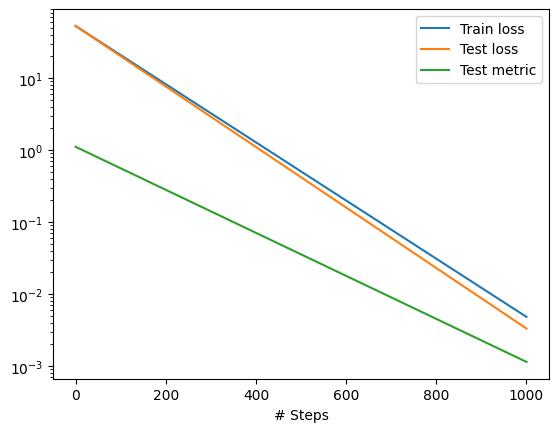

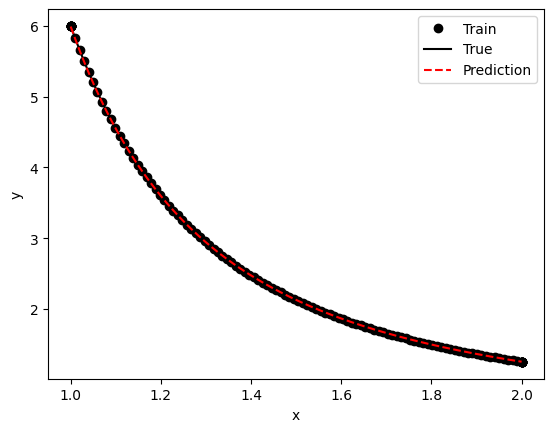

In [1]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde
import numpy as np
# Backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
# Backend pytorch
# import torch
# Backend jax
# import jax.numpy as jnp
# Backend paddle
# import paddle


def ode(x, y):
    # Most backends
    y_x = dde.grad.jacobian(y, x, j=0)
    y_xx = dde.grad.hessian(y, x, j=0)
    # x**2 * y_xx + 6*x*y_x + 4*y=0
    # Backend pytorch
    return x**2 * y_xx + 6*x*y_x + 4*y

def func(x):
    return 4*x**(-4) + 2 * x**(-1)

def boundary1(x, _):
    return dde.utils.isclose(x[0], 1)

def boundary2(x, _):
    return dde.utils.isclose(x[0], 2)

geom = dde.geometry.TimeDomain(1, 2)
bc1 = dde.icbc.DirichletBC(geom, lambda _: 6, boundary1)
bc2 = dde.icbc.DirichletBC(geom, lambda _: 5/4, boundary2)
data = dde.data.TimePDE(geom, ode, [bc1, bc2], 100, 10, solution=func, num_test=500, train_distribution="uniform")

layer_size = [1] + [30] * 4 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)

model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=1000)

dde.saveplot(losshistory, train_state, issave=False, isplot=True)